In [ ]:
import numpy as np
import pandas as pd

# Data Visualisation

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/IntroML/content/Housing.csv'
hs = pd.DataFrame(pd.read_csv(file_path))
display(hs)

# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
hs[varlist] = hs[varlist].apply(binary_map)
hs.head()

np.random.seed(0)
ts, vs = train_test_split(hs, train_size = 0.8, test_size = 0.2, random_state = 100)

y_ts = ts.pop('price')
y_vs = vs.pop('price')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Problem 1.a & 1.b

Theta values for Problem 1.a are:
[2.49110642e+191 1.50526799e+195 7.42794146e+191 3.31469976e+191
 4.59018045e+191 2.12611622e+191]

Theta values for Problem 1.b are:
[2.49110920e+191 1.50526966e+195 7.42794973e+191 3.31470345e+191
 4.59018556e+191 2.25831610e+191 4.90087875e+190 9.18653136e+190
 1.38284903e+190 8.46696844e+190 2.12611858e+191 6.72716933e+190]


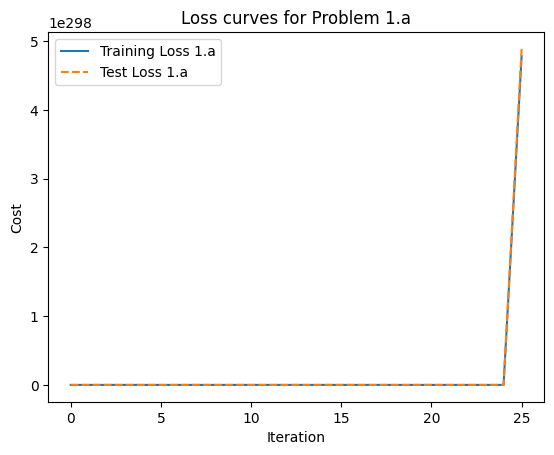

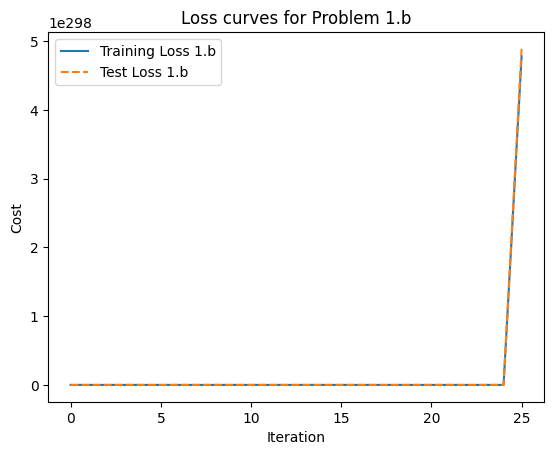

In [ ]:
# Function Definitions
def hypothesis(X, theta):
    return np.dot(X, theta)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    sq_errors = (predictions - y) ** 2
    return 1 / (2 * m) * np.sum(sq_errors)

def gradient_descent(X_train, y_ts, X_test, y_vs, theta, alpha, num_iters):
    m_train = len(X_train)
    m_test = len(X_test)

    J_history = []
    J_test_history = []

    for i in range(num_iters):
        gradients = ( 1 / m_train) * np.dot(X_train.T, hypothesis(X_train, theta) - y_ts)
        theta = theta - alpha * gradients

        J_history.append(compute_cost(X_train, y_ts, theta))
        J_test_history.append(compute_cost(X_test, y_vs, theta))

    return theta, J_history, J_test_history

# Problem 1.a
input = ['area',	'bedrooms',	'bathrooms',	'stories', 'parking']
x_train = ts[input]
x_test = vs[input]

X_ts_a = np.c_[np.ones(len(x_train)), x_train]
X_vs_a = np.c_[np.ones(len(x_test)), x_test]

alpha_a = 0.01 # You might need to adjust this value since features are not normalized
num_iters = 35
theta = np.zeros((X_ts_a.shape[1]))
theta_a, J_history_a, J_test_history_a = gradient_descent(X_ts_a, y_ts, X_vs_a, y_vs, theta, alpha_a, num_iters)

# Problem 1.b
input = ts.columns.tolist()[:-1]
x_train = ts[input]
x_test = vs[input]

X_ts_b = np.column_stack((np.ones(x_train.shape[0]), x_train))
X_vs_b = np.column_stack((np.ones(x_test.shape[0]), x_test))

alpha_b = 0.01
theta_b = np.zeros((X_ts_b.shape[1]))
theta_b, J_history_b, J_test_history_b = gradient_descent(X_ts_b, y_ts, X_vs_b, y_vs, theta_b, alpha_b, num_iters)

# Printing Theta Values for 1.a & 1.b
print("Theta values for Problem 1.a are:")
print(theta_a)

print("\nTheta values for Problem 1.b are:")
print(theta_b)

# Plotting for 1.a
plt.figure()
plt.plot(J_history_a, label='Training Loss 1.a')
plt.plot(J_test_history_a, label='Test Loss 1.a', linestyle = '--')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.title("Loss curves for Problem 1.a")
plt.show()

# Plotting for 1.b
plt.figure()
plt.plot(J_history_b, label='Training Loss 1.b')
plt.plot(J_test_history_b, label='Test Loss 1.b', linestyle='--')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.title("Loss curves for Problem 1.b")
plt.show()

Problem 2.a & 2.b

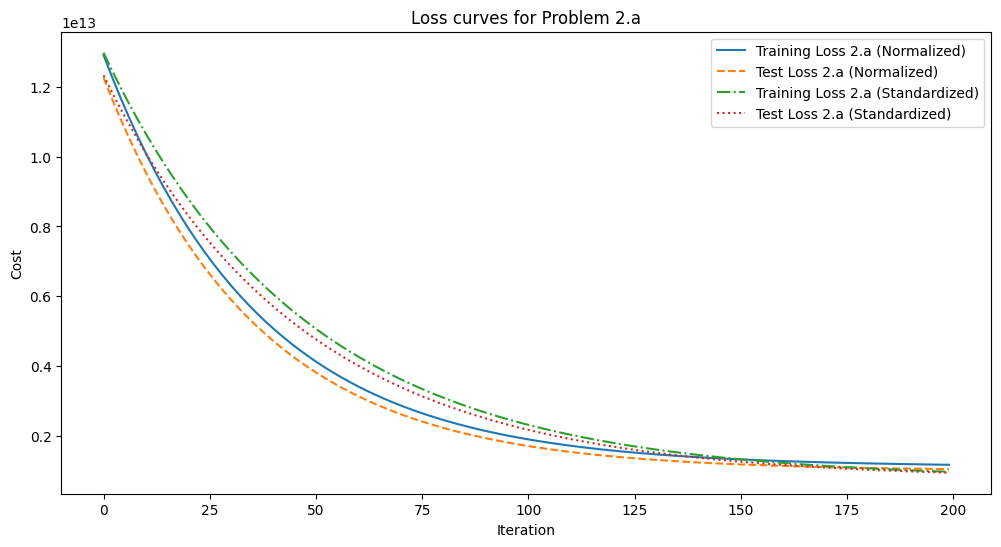

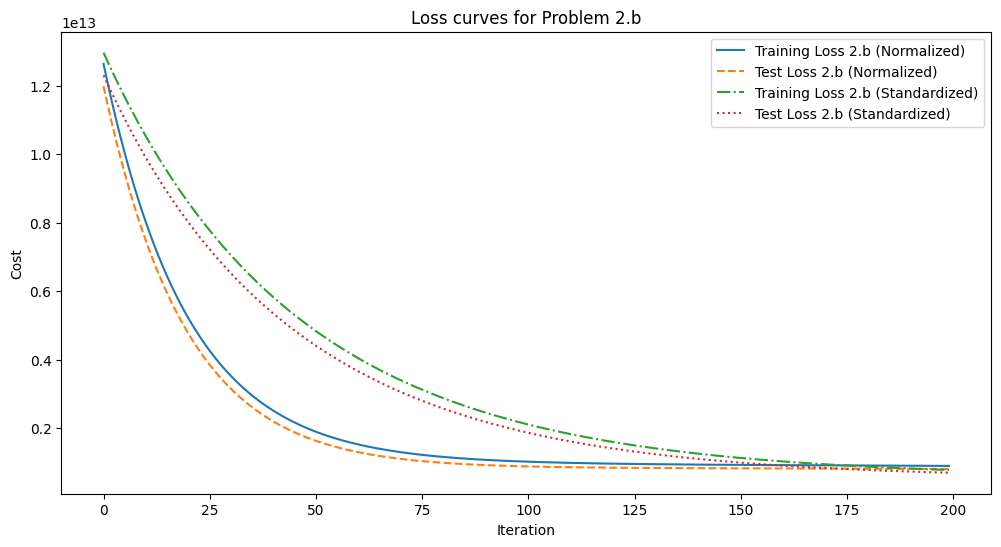

Theta values for Problem 2.a using Normalization are:
[3194993.69016285  969787.1393725  1345484.53688675  567917.97337196
 1135771.11292253 1001718.72176757]

Theta values for Problem 2.a using Standardization are:
[4153198.97855648  652228.09401443  179566.14159071  581119.0021684
  414878.25512247  312578.92071459]

Theta values for Problem 2.b using Normalization are:
[1867313.16725344  598370.84315987  830226.15917391  423119.30362039
  763470.75999053 1581218.68887524  424650.09864966  609710.29018813
  197995.57735397  868261.39554208  632417.01823974  553777.22001501]

Theta values for Problem 2.b using Standardization are:
[4153198.97855648  491262.01106858  154952.31887718  520643.40334621
  340124.15738718  226720.77119999  172900.35031198  128904.54043637
  174624.33392667  386971.74747033  246752.00430108  251015.12495278]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function Definitions
def hypothesis(X, theta):
    return np.dot(X, theta)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    sq_errors = (predictions - y) ** 2
    return 1 / (2 * m) * np.sum(sq_errors)

def gradient_descent(X_train, y_ts, X_test, y_vs, theta, alpha, num_iters):
    m_train = len(X_train)
    m_test = len(X_test)

    J_history = []
    J_test_history = []

    for i in range(num_iters):
        gradients = ( 1 / m_train) * np.dot(X_train.T, hypothesis(X_train, theta) - y_ts)
        theta = theta - alpha * gradients

        J_history.append(compute_cost(X_train, y_ts, theta))
        J_test_history.append(compute_cost(X_test, y_vs, theta))

    return theta, J_history, J_test_history

def normalize(data):
    return (data - data.min()) / (data.max() - data.min()), data.min(), data.max()

def standardize(data):
    return (data - data.mean()) / data.std(), data.mean(), data.std()

# Problem 2.a
input = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Using Normalization
x_train = ts[input]
x_test = vs[input]

x_train_norm, min_vals, max_vals = normalize(x_train)
x_test_norm = (x_test - min_vals) / (max_vals - min_vals)

X_ts_a_norm = np.c_[np.ones(len(x_train_norm)), x_train_norm]
X_vs_a_norm = np.c_[np.ones(len(x_test_norm)), x_test_norm]

alpha_a = 0.01
num_iters = 200
theta = np.zeros(X_ts_a_norm.shape[1])
theta_a_norm, J_history_a_norm, J_test_history_a_norm = gradient_descent(X_ts_a_norm, y_ts, X_vs_a_norm, y_vs, theta, alpha_a, num_iters)

# Using Standardization
x_train_std, mean, std_dev = standardize(x_train)
x_test_std = (x_test - mean) / std_dev

X_ts_a_std = np.c_[np.ones(len(x_train_std)), x_train_std]
X_vs_a_std = np.c_[np.ones(len(x_test_std)), x_test_std]

theta = np.zeros(X_ts_a_std.shape[1])
theta_a_std, J_history_a_std, J_test_history_a_std = gradient_descent(X_ts_a_std, y_ts, X_vs_a_std, y_vs, theta, alpha_a, num_iters)

# Problem 2.b
input = ts.columns.tolist()[:-1]

# Using Normalization
x_train = ts[input]
x_test = vs[input]

x_train_norm, min_vals, max_vals = normalize(x_train)
x_test_norm = (x_test - min_vals) / (max_vals - min_vals)

X_ts_b_norm = np.c_[np.ones(len(x_train_norm)), x_train_norm]
X_vs_b_norm = np.c_[np.ones(len(x_test_norm)), x_test_norm]

alpha_b = 0.01
theta_b = np.zeros(X_ts_b_norm.shape[1])
theta_b_norm, J_history_b_norm, J_test_history_b_norm = gradient_descent(X_ts_b_norm, y_ts, X_vs_b_norm, y_vs, theta_b, alpha_b, num_iters)

# Using Standardization
x_train_std, mean, std_dev = standardize(x_train)
x_test_std = (x_test - mean) / std_dev

X_ts_b_std = np.c_[np.ones(len(x_train_std)), x_train_std]
X_vs_b_std = np.c_[np.ones(len(x_test_std)), x_test_std]

theta_b = np.zeros(X_ts_b_std.shape[1])
theta_b_std, J_history_b_std, J_test_history_b_std = gradient_descent(X_ts_b_std, y_ts, X_vs_b_std, y_vs, theta_b, alpha_b, num_iters)

# Plotting for 2.a
plt.figure(figsize=(12, 6))
plt.plot(J_history_a_norm, label='Training Loss 2.a (Normalized)')
plt.plot(J_test_history_a_norm, label='Test Loss 2.a (Normalized)', linestyle='--')
plt.plot(J_history_a_std, label='Training Loss 2.a (Standardized)', linestyle='-.')
plt.plot(J_test_history_a_std, label='Test Loss 2.a (Standardized)', linestyle=':')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.title("Loss curves for Problem 2.a")
plt.show()

# Plotting for 2.b
plt.figure(figsize=(12, 6))
plt.plot(J_history_b_norm, label='Training Loss 2.b (Normalized)')
plt.plot(J_test_history_b_norm, label='Test Loss 2.b (Normalized)', linestyle='--')
plt.plot(J_history_b_std, label='Training Loss 2.b (Standardized)', linestyle='-.')
plt.plot(J_test_history_b_std, label='Test Loss 2.b (Standardized)', linestyle=':')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.title("Loss curves for Problem 2.b")
plt.show()

# Printing Theta Values for 2.a & 2.b
print("Theta values for Problem 2.a using Normalization are:")
print(theta_a_norm)
print("\nTheta values for Problem 2.a using Standardization are:")
print(theta_a_std)

print("\nTheta values for Problem 2.b using Normalization are:")
print(theta_b_norm)
print("\nTheta values for Problem 2.b using Standardization are:")
print(theta_b_std)



Problem 3a & 3b

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


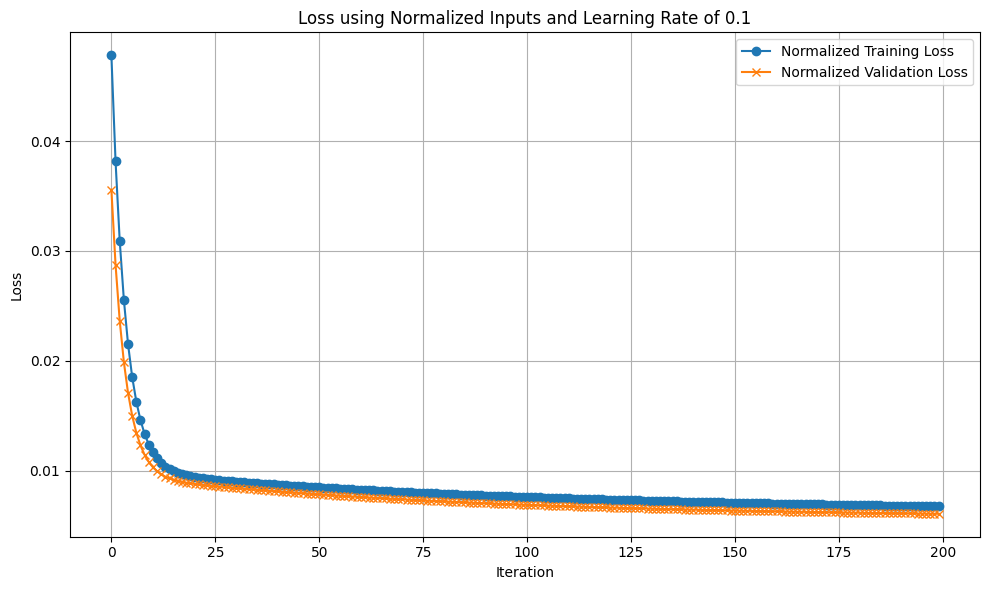

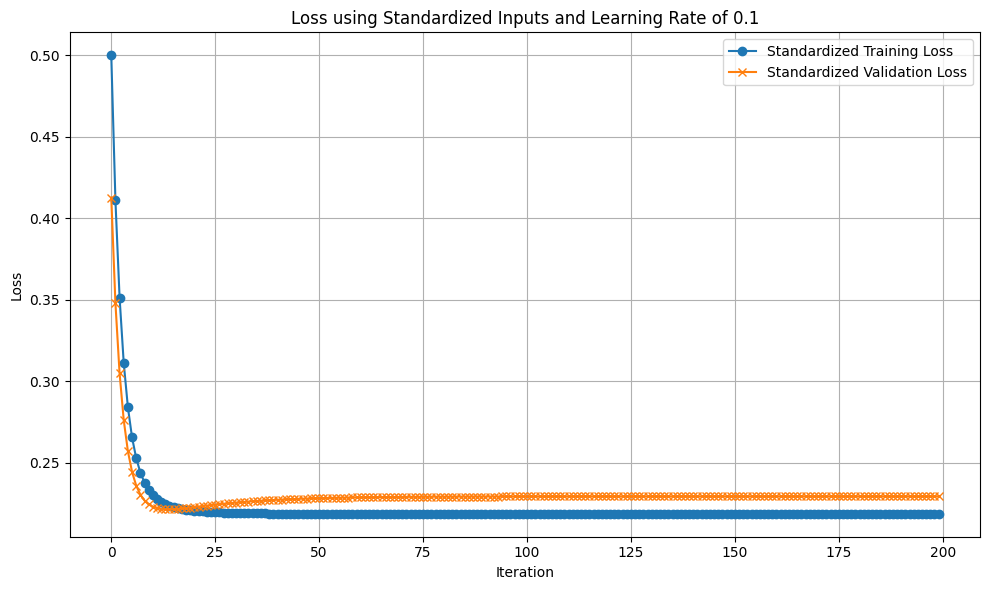

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming 'hs' is your dataframe containing the data
variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

np.random.seed(1)
df_training, df_validation = train_test_split(hs, train_size=0.8, test_size=0.2, random_state=100)

# Normalization
normalize = MinMaxScaler()
norm_training = normalize.fit_transform(df_training)
norm_validation = normalize.transform(df_validation)

norm_training = pd.DataFrame(norm_training, columns=df_training.columns)
norm_validation = pd.DataFrame(norm_validation, columns=df_validation.columns)

# Standardization
standardize = StandardScaler()
std_training = standardize.fit_transform(df_training)
std_validation = standardize.transform(df_validation)

std_training = pd.DataFrame(std_training, columns=df_training.columns)
std_validation = pd.DataFrame(std_validation, columns=df_validation.columns)

# Non-feature scaled Outputs
y_train = df_training.pop('price')
y_valid = df_validation.pop('price')

# Normalized Outputs
norm_y_train = norm_training.pop('price')
norm_y_valid = norm_validation.pop('price')

# Standardized Outputs
std_y_train = std_training.pop('price')
std_y_valid = std_validation.pop('price')

def train_model(inputs, x_training, x_validation, y_train, y_valid, learning_rate, iterations, lambda_=0.1):
    training_inputs = x_training[inputs]
    x_train = np.c_[np.ones((len(training_inputs), 1)), training_inputs]

    validation_inputs = x_validation[inputs]
    x_valid = np.c_[np.ones((len(validation_inputs), 1)), validation_inputs]

    n = x_train.shape[1]
    m_train = len(x_train)
    m_valid = len(x_valid)
    theta = np.zeros(n)

    train_losses = []
    valid_losses = []

    for i in range(iterations):
        h_theta = x_train.dot(theta)
        error = np.subtract(h_theta, y_train)

        gradient_reg = (lambda_ / m_train) * theta
        gradient_reg[0] = 0

        gradient = (1 / m_train) * (x_train.transpose().dot(error)) + gradient_reg
        theta -= (learning_rate * gradient)

        train_loss = 1 / (2 * m_train) * (np.sum(np.square((h_theta - y_train))) + lambda_ / 2 * np.sum(np.square(theta[1:])))
        valid_loss = 1 / (2 * m_valid) * np.sum(np.square((x_valid.dot(theta) - y_valid)))

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

    return train_losses, valid_losses

inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
learning_rate = [0.01]
iterations = 200
lambda_ = 0.1  # You can experiment with this regularization strength

def plot_losses(train_losses, valid_losses, scaling_type, learning_rate):
    plt.figure(figsize=(10, 6))

    plt.plot(train_losses, label=f"{scaling_type} Training Loss", linestyle='-', marker='o')
    plt.plot(valid_losses, label=f"{scaling_type} Validation Loss", linestyle='-', marker='x')

    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title(f"Loss using {scaling_type} Inputs and Learning Rate of {learning_rate}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Train and plot for normalized inputs with learning_rate = 0.1
norm_train_losses, norm_valid_losses = train_model(inputs, norm_training, norm_validation, norm_y_train, norm_y_valid, 0.1, iterations, lambda_)
plot_losses(norm_train_losses, norm_valid_losses, "Normalized", 0.1)

# Train and plot for standardized inputs with learning_rate = 0.1
std_train_losses, std_valid_losses = train_model(inputs, std_training, std_validation, std_y_train, std_y_valid, 0.1, iterations, lambda_)
plot_losses(std_train_losses, std_valid_losses, "Standardized", 0.1)
